### Exploration of Ames housing dataset

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
ls ../data/

AmesHousing.csv                 data_ready.csv
AmesResidentialMap.pdf          data_selected_features.csv
data_description.txt            decock.pdf
data_not_transformed_ready.csv


In [3]:
df = pd.read_csv('../data/AmesHousing.csv')
df.columns = df.columns.map(lambda x: x.replace(" ", "").replace("/",""))
df.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


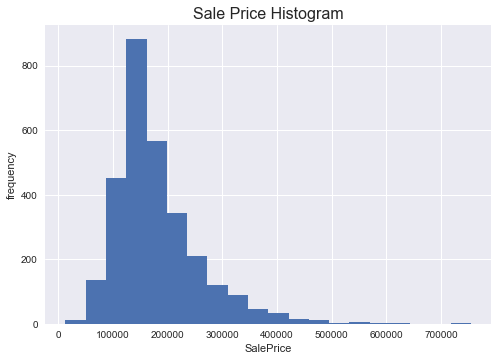

In [4]:
df.SalePrice.hist(bins=20)
plt.title("Sale Price Histogram", size=16)
plt.xlabel("SalePrice")
plt.ylabel("frequency")
plt.savefig('sale_price_hist.png')
plt.show()

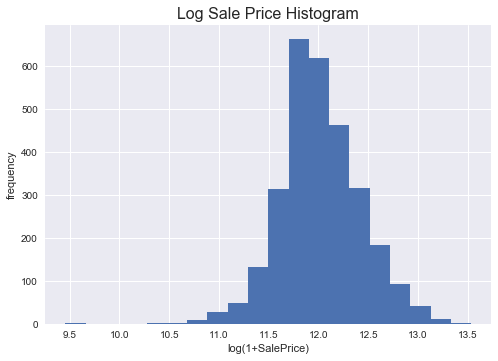

In [5]:
np.log(1+df.SalePrice).hist(bins=20)
plt.title("Log Sale Price Histogram", size=16)
plt.xlabel("log(1+SalePrice)")
plt.ylabel("frequency")
plt.savefig('log_sale_price_hist.png')
plt.show()

In [6]:
df.describe()

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
df.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'Order', 'OverallCond', 'OverallQual',
       'PID', 'PavedDrive', 'Pool

In [8]:
pd.set_option('display.max_rows', 500)
print(df.dtypes.sort_values())

Order              int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
1stFlrSF           int64
Fireplaces         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
WoodDeckSF         int64
YearRemodAdd       int64
SalePrice          int64
PID                int64
MSSubClass         int64
OverallQual        int64
YearBuilt          int64
OverallCond        int64
LotArea            int64
BsmtUnfSF        float64
TotalBsmtSF      float64
BsmtFinSF2       float64
GarageArea       float64
BsmtFinSF1       float64
GarageCars       float64
LotFrontage      float64
BsmtHalfBath     float64
MasVnrArea       float64
GarageYrBlt      float64
BsmtFullBath     float64
GarageFinish      object


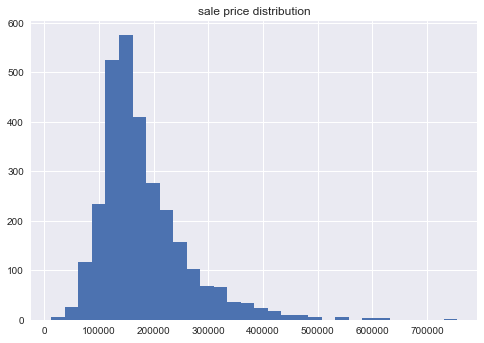

In [9]:
df['SalePrice'].hist(bins=30)
plt.title('sale price distribution')
plt.show()

In [10]:
salePrice = df['SalePrice'].copy()
salePrice.sort_values()

181      12789
1553     13100
726      34900
2843     35000
2880     35311
709      37900
1901     39300
1555     40000
727      44000
708      45000
1302     46500
2043     50000
307      50138
2879     51689
1220     52000
2689     52500
206      55000
1321     55000
1546     55000
306      55993
945      57625
287      58500
720      58500
662      59000
790      60000
742      60000
907      60000
765      61000
2184     61500
2653     61500
561      62383
753      62500
767      63000
780      63900
2656     64000
277      64000
1903     64000
1289     64000
1902     64500
2669     64500
1949     64500
1558     65000
1305     65000
695      66500
2239     67000
1514     67000
82       67500
2598     68000
2241     68104
304      68400
1349     68500
759      70000
2920     71000
2692     72000
2874     72000
1219     72500
1284     73000
2913     73000
2288     75000
943      75000
2677     75000
2290     75190
2237     75200
330      75500
329      76000
553      76000
397      7

### Numerical Features

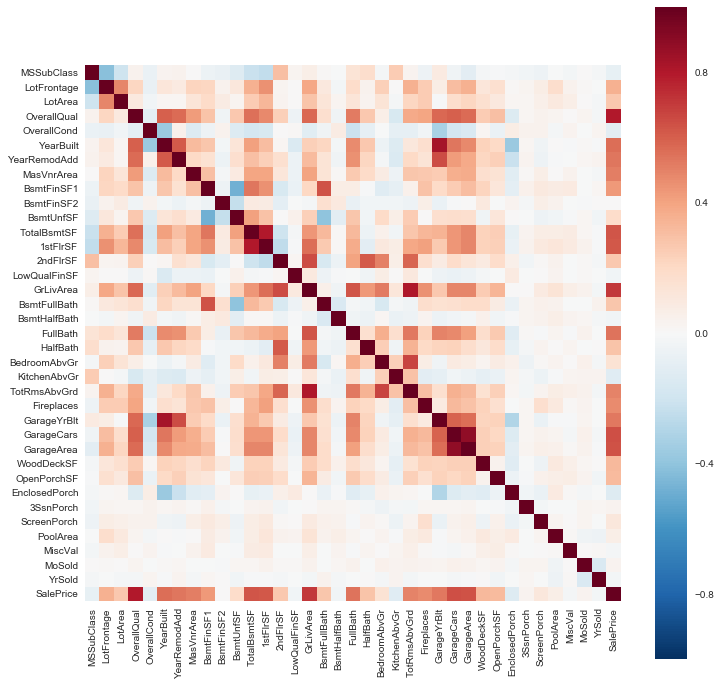

In [11]:
corr = df.select_dtypes(include=['float64','int64']).iloc[:, 2:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)
plt.show()

In [12]:
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
LotFrontage,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
LotArea,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
OverallQual,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
OverallCond,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
YearBuilt,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
YearRemodAdd,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
MasVnrArea,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFinSF1,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,-0.054129,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914
BsmtFinSF2,-0.070946,0.045999,0.083150,-0.041287,0.041134,-0.027415,-0.062129,-0.016019,-0.054129,1.000000,...,0.098528,-0.005587,0.032380,-0.023325,0.062951,0.044398,-0.005204,-0.009484,0.007105,0.005891


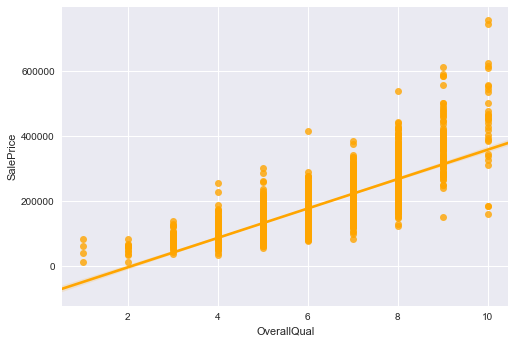

In [13]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = df, color = 'Orange')
plt.show()

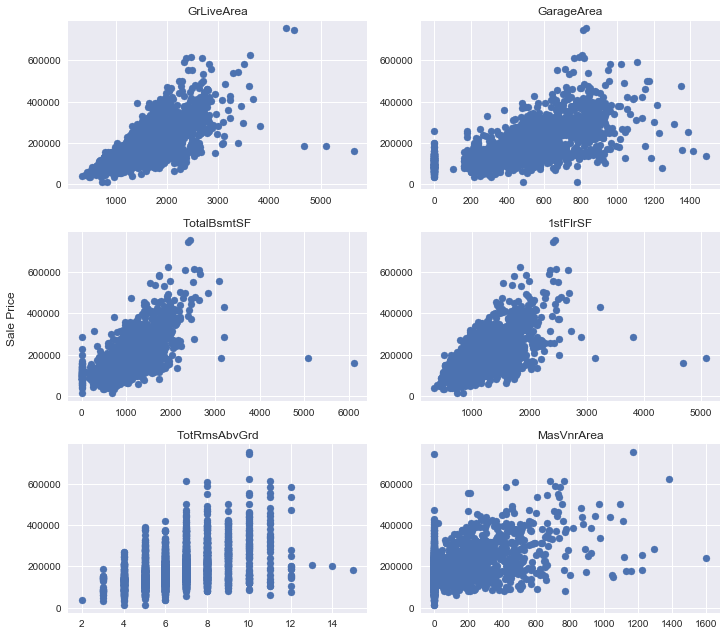

In [14]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = df.SalePrice.values
axarr[0, 0].scatter(df.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(df.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(df.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(df['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(df.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(df.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

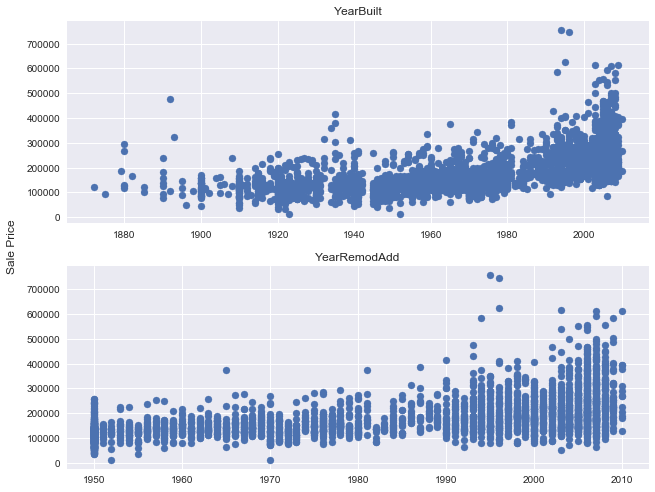

In [15]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
plt.scatter(df.YearBuilt.values, price)
plt.title('YearBuilt')

plt.subplot(212)
plt.scatter(df.YearRemodAdd.values, price)
plt.title('YearRemodAdd')

fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()

### Categorical Features

In [16]:
print(df.select_dtypes(include=['object']).columns.values)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


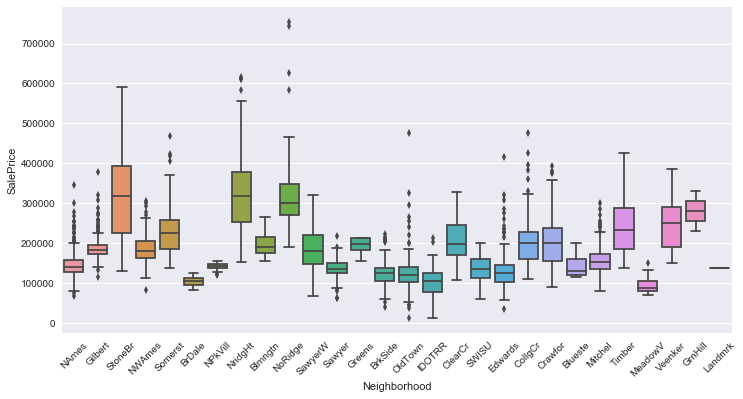

In [17]:
# Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
xt = plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [18]:
def list_nulls(df):
  for col in df.columns:
    print("NaN count: {}, {}, {}".format(df[col].isnull().sum(), col, df[col].dtype))

In [19]:
def list_data(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      print(df[col].value_counts())
    else:
      print(df[col].describe())

In [20]:
def impute_from(df, f_y, f_x, y_upper_limit=None, x_upper_limit=None):
  """
  Input data frame df, impute field f_y from field f_x,
  and return the imputed data frame.
  """
  df = df.copy()
  df_full = df.loc[np.logical_not(df[f_y].isnull())]
  x = df_full.loc[:,f_x]
  y = df_full.loc[:,f_y]
  plt.scatter(x, y)
  plt.xlabel(f_x)
  plt.ylabel(f_y)
  plt.show()
  if x_upper_limit is not None and y_upper_limit is not None:
    mask = (x < x_upper_limit) & (y <= y_upper_limit)
  else:
    mask = np.ones_like(x, dtype=bool)
  p = np.polyfit(x[mask], y[mask], 1) # degree 1
  df.loc[df[f_y].isnull(), f_y] = np.polyval(p, df.loc[df[f_y].isnull(), f_x])
  return df



In [21]:
df = pd.read_csv('../data/AmesHousing.csv')
df.columns = df.columns.map(lambda x: x.replace(" ", "").replace("/",""))
df = df.drop(['Order','PID'], axis=1)

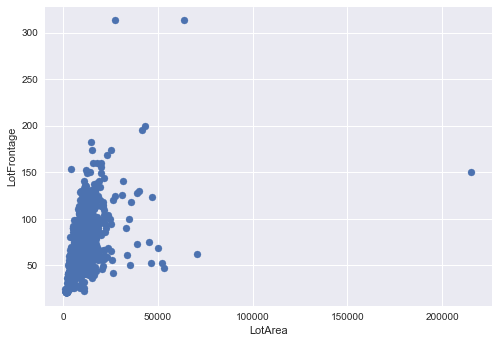

In [22]:
df = impute_from(df, "LotFrontage", "LotArea", 150, 25000)

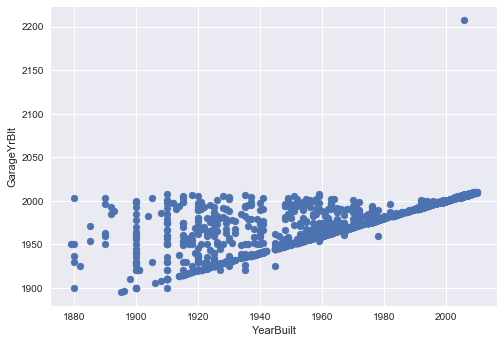

In [23]:
df = impute_from(df, "GarageYrBlt", "YearBuilt", 2010, 2010)

In [24]:
# There are many features were NaN should be considered as absence of such 
# property. In other cases I replace NaN with most common value
df.loc[df.Alley.isnull(), 'Alley'] = 'NoAlley'
df.loc[df.MasVnrType.isnull(), 'MasVnrType'] = 'None' # no good
df.loc[df.MasVnrType == 'None', 'MasVnrArea'] = 0
df.loc[df.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
df.loc[df.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
df.loc[df.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
df.loc[df.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
df.loc[df.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
df.loc[df.BsmtFinType1=='NoBsmt', 'BsmtFinSF1'] = 0
df.loc[df.BsmtFinType2=='NoBsmt', 'BsmtFinSF2'] = 0
df.loc[df.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = df.BsmtFinSF1.median()
df.loc[df.BsmtQual=='NoBsmt', 'BsmtUnfSF'] = 0
df.loc[df.BsmtUnfSF.isnull(), 'BsmtUnfSF'] = df.BsmtUnfSF.median()
df.loc[df.BsmtQual=='NoBsmt', 'TotalBsmtSF'] = 0
df.loc[df.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'
df.loc[df.GarageType.isnull(), 'GarageType'] = 'NoGarage'
df.loc[df.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
df.loc[df.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
df.loc[df.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'
df.loc[df.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
df.loc[df.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0
df.loc[df.KitchenQual.isnull(), 'KitchenQual'] = 'TA'
df.loc[df.MSZoning.isnull(), 'MSZoning'] = 'RL'
df.loc[df.Utilities.isnull(), 'Utilities'] = 'AllPub'
df.loc[df.Exterior1st.isnull(), 'Exterior1st'] = 'VinylSd'
df.loc[df.Exterior2nd.isnull(), 'Exterior2nd'] = 'VinylSd'
df.loc[df.Functional.isnull(), 'Functional'] = 'Typ'
df.loc[df.SaleCondition.isnull(), 'SaleCondition'] = 'Normal'
df.loc[df.SaleCondition.isnull(), 'SaleType'] = 'WD'
df.loc[df['PoolQC'].isnull(), 'PoolQC'] = 'NoPool'
df.loc[df['Fence'].isnull(), 'Fence'] = 'NoFence'
df.loc[df['MiscFeature'].isnull(), 'MiscFeature'] = 'None'
df.loc[df['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
# only one is null and it has type Detchd
df.loc[df['GarageArea'].isnull(), 'GarageArea'] = df.loc[df['GarageType']=='Detchd', 'GarageArea'].mean()
df.loc[df['GarageCars'].isnull(), 'GarageCars'] = df.loc[df['GarageType']=='Detchd', 'GarageCars'].median()

In [25]:
# where we have order we will use numeric
df = df.replace({
  'Utilities': {'AllPub': 1, 'NoSeWa': 0, 'NoSewr': 0, 'ELO': 0},
  'Street': {'Pave': 1, 'Grvl': 0 },
  'FireplaceQu': {'Ex': 5, 
                'Gd': 4, 
                'TA': 3, 
                'Fa': 2,
                'Po': 1,
                'NoFireplace': 0 
                },
  'Fence': {'GdPrv': 2, 
           'GdWo': 2, 
           'MnPrv': 1, 
           'MnWw': 1,
           'NoFence': 0},
  'ExterQual': {'Ex': 5, 
                'Gd': 4, 
                'TA': 3, 
                'Fa': 2,
                'Po': 1
                },
  'ExterCond': {'Ex': 5, 
                'Gd': 4, 
                'TA': 3, 
                'Fa': 2,
                'Po': 1
                },
  'BsmtQual': {'Ex': 5, 
                'Gd': 4, 
                'TA': 3, 
                'Fa': 2,
                'Po': 1,
                'NoBsmt': 0},
  'BsmtExposure': {'Gd': 3, 
                'Av': 2, 
                'Mn': 1,
                'No': 0,
                'NoBsmt': 0},
  'BsmtCond': {'Ex': 5, 
                'Gd': 4, 
                'TA': 3, 
                'Fa': 2,
                'Po': 1,
                'NoBsmt': 0},
  'GarageQual': {'Ex': 5, 
                'Gd': 4, 
                'TA': 3, 
                'Fa': 2,
                'Po': 1,
                'NoGarage': 0},
  'GarageCond': {'Ex': 5, 
                'Gd': 4, 
                'TA': 3, 
                'Fa': 2,
                'Po': 1,
                'NoGarage': 0},
  'KitchenQual': {'Ex': 5, 
                'Gd': 4, 
                'TA': 3, 
                'Fa': 2,
                'Po': 1},
  'HeatingQC': {'Ex': 5,
                'Gd': 4,
                'TA': 3,
                'Fa': 2,
                'Po': 1},
  'PoolQC': {'Ex': 5,
             'Gd': 4,
             'TA': 3,
             'Fa': 2,
             'NoPool': 0},
  'Functional': {'Typ': 0,
                'Min1': 1,
                'Min2': 1,
                'Mod': 2,
                'Maj1': 3,
                'Maj2': 4,
                'Sev': 5,
                'Sal': 6}
})

In [26]:
df = df.replace({
  'MSSubClass': {
    20: 'SubClass_20', 
    30: 'SubClass_30', 
    40: 'SubClass_40', 
    45: 'SubClass_45',
    50: 'SubClass_50', 
    60: 'SubClass_60',
    70: 'SubClass_70',
    75: 'SubClass_75',
    80: 'SubClass_80',
    85: 'SubClass_85',
    90: 'SubClass_90',
   120: 'SubClass_120',
   150: 'SubClass_150',
   160: 'SubClass_160',
   180: 'SubClass_180',
   190: 'SubClass_190'}
})

In [27]:
list_nulls(df)

NaN count: 0, MSSubClass, object
NaN count: 0, MSZoning, object
NaN count: 0, LotFrontage, float64
NaN count: 0, LotArea, int64
NaN count: 0, Street, int64
NaN count: 0, Alley, object
NaN count: 0, LotShape, object
NaN count: 0, LandContour, object
NaN count: 0, Utilities, int64
NaN count: 0, LotConfig, object
NaN count: 0, LandSlope, object
NaN count: 0, Neighborhood, object
NaN count: 0, Condition1, object
NaN count: 0, Condition2, object
NaN count: 0, BldgType, object
NaN count: 0, HouseStyle, object
NaN count: 0, OverallQual, int64
NaN count: 0, OverallCond, int64
NaN count: 0, YearBuilt, int64
NaN count: 0, YearRemodAdd, int64
NaN count: 0, RoofStyle, object
NaN count: 0, RoofMatl, object
NaN count: 0, Exterior1st, object
NaN count: 0, Exterior2nd, object
NaN count: 0, MasVnrType, object
NaN count: 0, MasVnrArea, float64
NaN count: 0, ExterQual, int64
NaN count: 0, ExterCond, int64
NaN count: 0, Foundation, object
NaN count: 0, BsmtQual, int64
NaN count: 0, BsmtCond, int64
NaN cou

In [28]:
list_data(df)

SubClass_20     1079
SubClass_60      575
SubClass_50      287
SubClass_120     192
SubClass_30      139
SubClass_160     129
SubClass_70      128
SubClass_80      118
SubClass_90      109
SubClass_190      61
SubClass_85       48
SubClass_75       23
SubClass_45       18
SubClass_180      17
SubClass_40        6
SubClass_150       1
Name: MSSubClass, dtype: int64
RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MSZoning, dtype: int64
count    2930.000000
mean       71.120287
std        29.971931
min        21.000000
25%        60.000000
50%        69.760416
75%        80.000000
max       688.064377
Name: LotFrontage, dtype: float64
count      2930.000000
mean      10147.921843
std        7880.017759
min        1300.000000
25%        7440.250000
50%        9436.500000
75%       11555.250000
max      215245.000000
Name: LotArea, dtype: float64
count    2930.000000
mean        0.995904
std         0.063876
min         0

### Log transformation on variables

In [29]:
def list_histogram(df, dtypes):
  for col in df.columns:
    if df[col].dtype in dtypes:
      df[col].hist()
      plt.title(col)
      plt.show()

In [30]:
def log_transform(df, col):
  df.loc[:, col] = np.log(df.loc[:, col]+1)

In [31]:
data = df.copy()
vars_to_transform = ['SalePrice']

for col in vars_to_transform:
  log_transform(data, col)
pd.get_dummies(data).to_csv('../data/data_not_transformed_ready.csv', index=False)

In [32]:
vars_to_transform = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

for col in vars_to_transform:
  log_transform(data, col)

In [33]:
pd.get_dummies(data).to_csv('../data/data_ready.csv', index=False)

In [34]:
vars_to_transform = ['YearBuilt', 'GarageYrBlt', 'YearRemodAdd']

for col in vars_to_transform:
  log_transform(data, col)
  
pd.get_dummies(data).to_csv('../data/data_ready_year_trans.csv', index=False)